<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyRANDOM</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>RANDOM</b> <b style=color:red;>NUMBERS</b></p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyRANDOM.png"></td>
</tr>
</table>

----
# `pyRANDOM`

pyRANDOM, a collection of jupyter notebooks playing with **random numbers** ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import ipywidgets as widgets
from ipywidgets import interactive

----
# 2D random walk
In this notebook, we create **random walks** in two dimensions (along the $x$ and $y$ axis).

We start from an **initial position** $(x_0,y_0)=(0,0)$, the **successive steps** $i=1,N$ are
$$
\begin{array}{rcl}
x_i &=& x_{i-1} + r_x \Delta x \\
y_i &=& y_{i-1} + r_y \Delta y
\end{array}
$$
with $\Delta x, \Delta y$ the **step sizes**, and the two **random numbers**:
$$
\begin{array}{rcl}
r_x & \in & [-1,0,1] \\
r_y & \in & [-1,0,1]
\end{array}
$$
thus, for every coordinate direction, a step in negative or positive direction, or no step.

We use the `rng.integers` function from `numpy` to 
- first integer random numbers 1,2,3,4, 
- use them for the four directions. 

In [2]:
n=100
rng = np.random.default_rng(seed=12)
rng.integers(1,5,n)

array([3, 2, 4, 4, 1, 1, 1, 1, 3, 2, 2, 1, 4, 3, 3, 1, 1, 4, 2, 4, 4, 1,
       2, 3, 2, 1, 3, 2, 2, 2, 2, 2, 4, 2, 3, 4, 1, 2, 3, 1, 3, 3, 3, 4,
       2, 4, 4, 4, 2, 1, 4, 4, 2, 3, 1, 4, 4, 2, 4, 1, 4, 4, 4, 3, 1, 4,
       3, 1, 4, 1, 2, 4, 4, 1, 2, 4, 3, 1, 2, 3, 1, 2, 2, 2, 3, 1, 4, 4,
       3, 4, 1, 3, 4, 3, 3, 3, 3, 3, 3, 3])

In [3]:
def random_walk2D(n=20000,xp=1,xm=1,yp=1,ym=1,seed=12):
    """
    random walk in 2D
    """
    rng = np.random.default_rng(seed=seed)
    direction = rng.integers(1,5,n)
    x = np.array([0])
    y = np.array([0])

    for i in range(1,n):
        if (direction[i] == 1):
            x = np.append(x,x[i-1]+xp)
            y = np.append(y,y[i-1])
        elif (direction[i] == 2):
            x = np.append(x,x[i-1]-xm)
            y = np.append(y,y[i-1])
        elif (direction[i] == 3):
            x = np.append(x,x[i-1])
            y = np.append(y,y[i-1]+yp)
        elif (direction[i] == 4):
            x = np.append(x,x[i-1])
            y = np.append(y,y[i-1]-ym)
        #print (step,steps,direction)
    
    plt.plot(x,y,linewidth=0.5)
    plt.plot(x[0],y[0],linewidth=0,marker='o',color='green',markersize=10,label='start')
    plt.plot(x[i],y[i],linewidth=0,marker='o',color='red',markersize=10,label='end')
    plt.legend()
    return

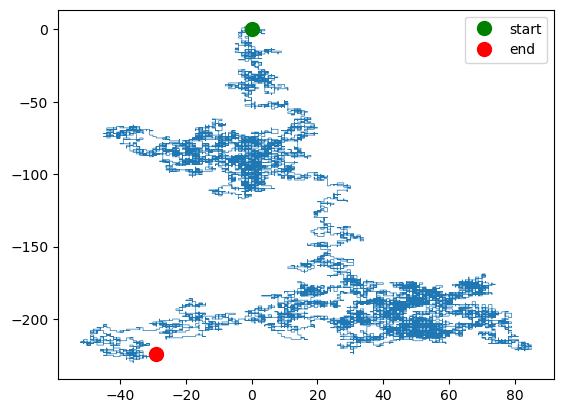

In [4]:
random_walk2D()

In [5]:
interactive_plot = interactive(random_walk2D,
                               xm=widgets.FloatSlider(min=1,max=2,step=0.05,value=1.0,description='xm'),
                               xp=widgets.FloatSlider(min=1,max=2,step=0.05,value=1.05,description='xp'),
                               ym=widgets.FloatSlider(min=1,max=2,step=0.05,value=1.0,description='ym'),
                               yp=widgets.FloatSlider(min=1,max=2,step=0.05,value=1.05,description='yp'),
                               n=widgets.IntSlider(min=1000,max=10000,step=100,value=10000,description='n'),
                               seed=widgets.IntSlider(min=10,max=100,step=1,value=12,description='seed')
                              )
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=10000, description='n', max=10000, min=1000, step=100), FloatSlider(valu…

----